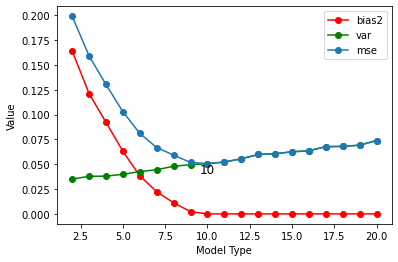

In [237]:
# 导入包
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import statsmodels.api as sm

# 各参数取值
alpha = 0.05
p1 = 10
p = 20
n = 300
M = 5000

# 上帝视角下的beta
beta = []
for i in range(p1 + 1):
    beta.append(1)
for i in range(p - p1):
    beta.append(0)
beta = np.array(beta)

# 上帝视角下的y0
x0 = [1]
for i in range(p):
    x0.append(0.05)
x0 = np.array(x0)
y0 = np.dot(x0, beta)

bias2 = []
var = []
mse = []

# 从欠拟合到过拟合，从偏差平方和、方差和MSE的角度来观察
for k in range(2, 21):
    y0_hat = []
    # 第 k 个模型重复 M 次
    for itera in range(M):
        # 构造 n*(p+1) 维自变量矩阵 \sigma_x = 0.2
        X = np.random.normal(loc =0.0 , scale= 0.2, size = (300,20))
        X = np.column_stack((np.ones(n), X))
        
        # 构造误差项 \sigma_y = 3
        epsilon = np.random.normal(loc =0.0 , scale= 3, size = (1,300))
        
        # 构造因变量 
        y = np.dot(X, beta) + epsilon
        y = y.T
        # print(y.shape)

        # Do the simple linear regression
        # OLS（endog,exog=None,missing='none',hasconst=None) (endog:因变量，exog=自变量）
        X_k = X[:,0:k+1]
        model = sm.OLS(y, X_k).fit()
        beta_hat = model.params
        for i in range(p - k):
            beta_hat = np.append(beta_hat, 0)
        
        # y 的拟合值
        y_hat = model.fittedvalues 
        # model.summary()

        y_mean = np.mean(y)
        SSE = sum((y - y_hat) ** 2)
        # SST = sum((y - y_mean) ** 2)
        # SSR = sum((y_hat - y_mean) ** 2)

        sigma2 = SSE / (n - p - 1)  # 方差
        sigma = np.sqrt(sigma2)  # 标准差
        
        # 求第 k 个模型下 y0 预测值
        y0_hat.append(np.dot(x0, beta_hat))

    y0_hat_mean = np.mean(y0_hat)
    bias2.append((np.mean(y0_hat - y0) ** 2))
    var.append(np.mean((y0_hat - y0_hat_mean) ** 2))
    mse.append(np.mean((y0_hat - y0) ** 2))

# 分组
model_type = range(2,21)
c1 = pd.Series(bias2, index = model_type, name = 'bias2')
c2 = pd.Series(var, index = model_type, name = 'var')
c3 = pd.Series(mse, index = model_type, name = 'mse')
df = pd.concat([c1, c2, c3], axis = 1)

# 标出 MSE 最小时对应的自变量个数
y_min = np.min(mse)
x_min = mse.index(np.min(mse)) + 2 # 索引从 0 开始，模型 k 从 2 开始
# print(mse)
# print(y_min)
plt.text(x_min, y_min, '%d' % int(x_min), ha='center', va= 'top', fontsize=12)

# 画图
plt.plot(df.iloc[:,0], color = 'red', marker = 'o', label = 'bias2')
plt.plot(df.iloc[:,1], color = 'green', marker = 'o', label = 'var')
plt.plot(df.iloc[:,2], marker = 'o', label = 'mse')
plt.xlabel('Model Type')
plt.ylabel('Value')
plt.legend(['bias2', 'var', 'mse'])
